### 🔹 Polynomial Regression  

Polynomial Regression is an extension of Linear Regression that allows us to model **non-linear relationships** between the input feature(s) and the target variable.  
Instead of fitting a straight line, Polynomial Regression fits a **curved line** to capture more complex patterns in the data.  

The mathematical model can be expressed as:  

$$
Y = a_0 + a_1X + a_2X^2 + a_3X^3 + \dots + a_nX^n
$$  

where:  
- $a_0, a_1, a_2, a_3, ... , a_n$ are the coefficients of the polynomial,  
- $n$ is the degree of the polynomial (higher degree allows more flexibility),  
- The model can represent curved trends instead of just straight lines.  

Polynomial Regression helps us to:  
- Capture non-linear trends in the data.  
- Improve prediction accuracy when relationships are not strictly linear.  
- Build a bridge to more advanced non-linear models in machine learning.  

In this notebook, we will implement Polynomial Regression step by step and see how adding polynomial features can dramatically improve our model’s performance 🚀.  


# --------------------------------------------------------------------------

# import dataset

In [1]:
# from google.colab import files, drive

# up = files.upload()
# drive.mount('/content/drive')

In [2]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,f1,T
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      1067 non-null   float64
 1   T       1067 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.8 KB


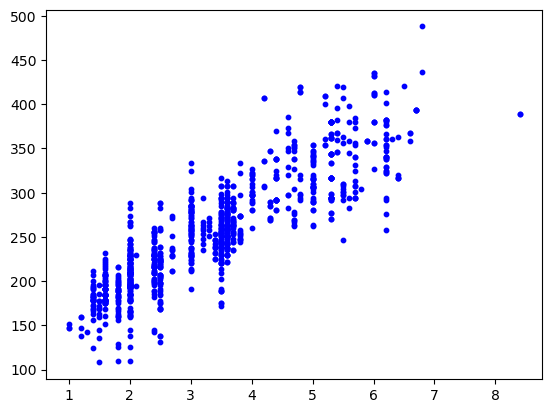

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['f1'], df['T'], s=10, c='b')
plt.show()

# cleaning

In [5]:
# clean the data

# encoding

In [6]:
# encode the data

## define x , y

In [7]:
import numpy as np

x = np.array(df[['f1']])     # 2D
y = np.array(df['T'])        # 1D

In [8]:
x[:5]

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5]])

In [9]:
y[:5]

array([196, 221, 136, 255, 244])

# spliting

In [10]:
# # finding best random state 

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# pnf = PolynomialFeatures(degree=2)
# from sklearn.linear_model import LinearRegression
# pr = LinearRegression()
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import PolynomialFeatures

# import time
# t1 = time.time()
# lst = []
# for i in range(1,10):
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
#     x_train_pnf = pnf.fit_transform(x_train)
#     x_test_pnf = pnf.transform(x_test)
#     pr.fit(x_train_pnf, y_train)
#     yhat_test = pr.predict(x_test_pnf)
#     r2 = r2_score(y_test, yhat_test)
#     lst.append(r2)
    
# t2 = time.time()
# print(f"run time: {round((t2 - t1)/60, 2)} min")
# print(f"r2_score: {round(max(lst), 2)}")
# rs = np.argmax(lst) + 1
# print(f"random_state: {rs}")

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

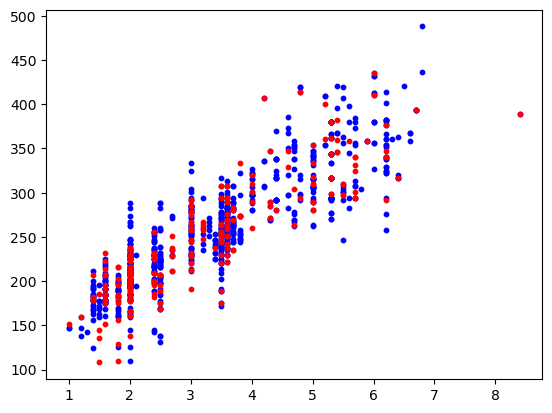

In [12]:
plt.scatter(x_train, y_train, s=10, c='b')
plt.scatter(x_test, y_test, s=10, c='r')
plt.show()

# preprocessing on x data

In [13]:
from sklearn.preprocessing import PolynomialFeatures

pnf = PolynomialFeatures(degree=2).fit(x_train)

In [14]:
x_train_pnf = pnf.transform(x_train)
x_test_pnf = pnf.transform(x_test)

In [15]:
x_train_pnf[:3]

array([[ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ]])

# scaling

In [16]:
# No need for scaling in polynomial regression

# fit train data

In [17]:
# # K-fold cross validation

# from sklearn.model_selection import GridSearchCV

# parameters = {
#     'fit_intercept': [True, False],
#     'copy_X': [True, False],
#     'n_jobs': [None],
#     'positive': [True, False]
# }

# pr = LinearRegression()
# gs = GridSearchCV(estimator=pr, param_grid=parameters, cv=5)

# gs.fit(x_train, y_train)

# best_params = gs.best_params_
# print(best_params)

In [18]:
# def param
# fit_intercept=True, copy_X=True, n_jobs=None, positive=False

In [19]:
from sklearn.linear_model import LinearRegression

pr = LinearRegression()
pr.fit(x_train_pnf, y_train)

LinearRegression()

$
Y = a_0 + a_1X + a_2X^2 + a_3X^3 + \dots + a_nX^n
$

In [20]:
print(pr.intercept_)
print(pr.coef_)

112.92021963451728
[ 0.         47.42976379 -1.12705382]


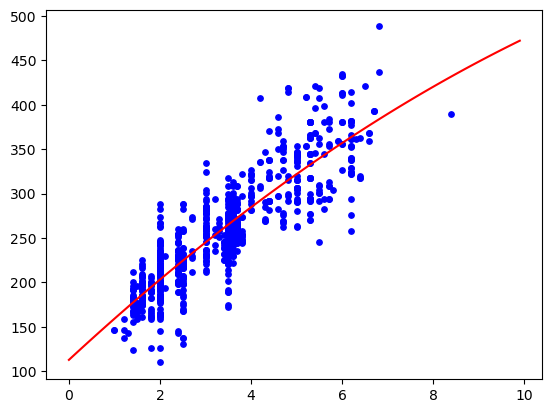

In [21]:
xx = np.arange(0,10,0.1)
plt.scatter(x_train, y_train, s=15, c='b')
plt.plot(xx, pr.intercept_ + pr.coef_[1] * xx + pr.coef_[2] * np.power(xx, 2) , c='r')
plt.show()

# predict test data

In [22]:
yhat_test = pr.predict(x_test_pnf)

# evaluate the model

In [23]:
from sklearn.metrics import r2_score

print("r2-score (train data): %0.4f" % r2_score(y_train, pr.predict(x_train_pnf)))
print("r2-score (test data): %0.4f" % r2_score(y_test, yhat_test))

r2-score (train data): 0.7658
r2-score (test data): 0.7676


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(f"MSE (train data): {mean_squared_error(y_train, pr.predict(x_train_pnf))}")
print(f"RMSE (train data): {np.sqrt(mean_squared_error(y_train, pr.predict(x_train_pnf)))}")
print(f"MAE (train data): {mean_absolute_error(y_train, pr.predict(x_train_pnf))}")
print('------------')
print(f"MSE (test data): {mean_squared_error(y_test, yhat_test)}")
print(f"RMSE (test data): {np.sqrt(mean_squared_error(y_test, yhat_test))}")
print(f"MAE (test data): {mean_absolute_error(y_test, yhat_test)}")

MSE (train data): 931.2807597015274
RMSE (train data): 30.516893021759724
MAE (train data): 23.184491692811502
------------
MSE (test data): 960.8705832028328
RMSE (test data): 30.997912562023153
MAE (test data): 23.915883545298716


# predict new data

In [25]:
pr.predict(pnf.transform([[2]]))

array([203.27153193])

# save the model

In [26]:
# import joblib

# joblib.dump(pr, 'pr_model.pkl')

# load the model

In [27]:
# import joblib

# pr = joblib.load('pr_model.pkl')